In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [2]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [4]:
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
data = pd.read_csv('./datasets/Movies-Poster/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    path = './datasets/Movies-Poster/Images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:33<00:00, 217.89it/s]


In [9]:
X.shape

(7254, 350, 350, 3)

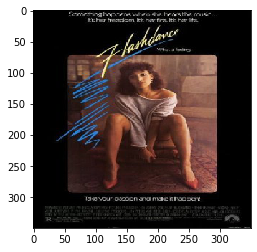

In [10]:
plt.imshow(X[1])

In [11]:
y = data.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)